# Project: Wrangling and Analyze Data

## Table of Contents
<ul>
<li><a href="#lib">Importing the Required Libraries</a></li>
<li><a href="#gather">Data Gathering</a></li>
<li><a href="#assess">Assessing Data</a></li>
<li><a href="#issues">Issues Observed</a></li>
    <ul>
        <li><a href="#quality">Quality Issues</a></li>
        <li><a href="#tid">Tidiness Issues</a></li>
    </ul>
<li><a href="#clean">Cleaning Data</a></li>
<li><a href="#store">Storing Data</a></li>
<li><a href="#analyze">Analyzing and Visualizing Data</a></li>
    <ul>
        <li><a href="#ins">Insights</a></li>
        <li><a href="#viz">Visualizations</a></li>
    </ul>
</ul>

<a id='lib'></a>
## Importing the Required Libraries

We are going to first import the required libraries as shown below:

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns; sns.set()
import json
from sqlalchemy import create_engine
from io import BytesIO
from PIL import Image

# Ensuring that floats are displayed with two decimals
pd.set_option('display.float_format', '{:20,.2f}'.format)

# Ensuring that all columns are displayed
pd.set_option('display.max_columns', None)

<a id='gather'></a>
## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# loading the 'twitter-archive-enhanced.csv' file into pandas data frame
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# downloading the 'image_predictions.tsv' file programmatically from the url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(url.split('/')[-1]), 'wb') as file:
    file.write(response.content)

In [4]:
# loading 'image_predictions.tsv' file into pandas data frame
df_image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
# downloading data from the twitter APT
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [5]:
# Loading tweets data into a pandas data frame
if not os.path.exists('tweet_json.txt'):
    get_twitter_data(df_archive, 'tweet_json.text')

In [6]:
# Reading tweets data line by line into a pandas data frame
with open('tweet_json.txt') as file:
    df_API = pd.read_json(file, lines = True, encoding = 'utf-8')

<a id='assess'></a>
## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [7]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,nan,nan,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,nan,nan,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,nan,nan,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
df_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,nan,nan,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,nan,nan,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,nan,nan,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,nan,nan,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,nan,nan,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,nan,nan,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,nan,nan,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,nan,nan,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,nan,nan,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,nan,nan,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [9]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
# Show all the columns in the df_archive dataset
df_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [11]:
# Display the descriptive statistics for 'rating_numerator' and 'rating_denominator' columns
df_archive[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,"2,356.00","2,356.00"
mean,13.13,10.46
std,45.88,6.75
min,0.00,0.00
25%,10.00,10.00
50%,11.00,10.00
75%,12.00,10.00
max,"1,776.00",170.00


In [12]:
# Display the unique 'name' column values
df_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [13]:
df_archive.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Cooper       11
Lucy         11
Lola         10
Penny        10
Tucker       10
Bo            9
Winston       9
the           8
Sadie         8
Bailey        7
Toby          7
Buddy         7
an            7
Daisy         7
Leo           6
Milo          6
Stanley       6
Bella         6
Koda          6
Dave          6
Rusty         6
Scout         6
Jax           6
Oscar         6
Jack          6
Sunny         5
           ... 
Sky           1
Richie        1
Mack          1
Autumn        1
Swagger       1
Ed            1
Leonard       1
Monster       1
Malikai       1
Loomis        1
Flurpson      1
Crawford      1
Jareld        1
Dwight        1
Herb          1
Jersey        1
Henry         1
Bruiser       1
Aubie         1
Franq         1
Harrison      1
Clyde         1
Charl         1
Clifford      1
Banditt       1
Ralphie       1
Tiger         1
Kallie        1
Combo         1
Maude         1
Name: name, Length: 957,

In [14]:
df_archive[df_archive.name.str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,nan,nan,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,nan,nan,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,nan,nan,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,nan,nan,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,nan,nan,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,"859,196,978,902,773,760.00","4,196,983,835.00",2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,nan,nan,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,nan,nan,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,nan,nan,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",nan,nan,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
335,832645525019123713,nan,nan,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,nan,nan,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
369,828650029636317184,nan,nan,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",nan,nan,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
542,806219024703037440,nan,nan,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,nan,nan,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
649,792913359805018113,nan,nan,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,nan,nan,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
682,788552643979468800,nan,nan,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,"736,392,552,031,657,984.00","4,196,983,835.00",2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None


In [15]:
# Looking for the rating_numerators with wrong values
df_archive[df_archive.rating_numerator <= 5].loc[0:1000, :]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,nan,nan,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,nan,nan,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
315,835152434251116546,nan,nan,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,nan,nan,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
605,798576900688019456,nan,nan,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Not familiar with this breed. N...,"666,104,133,288,665,088.00","4,196,983,835.00",2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
730,781661882474196992,nan,nan,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Who keeps sending in pictures without dogs in ...,nan,nan,NaN,https://twitter.com/dog_rates/status/781661882...,5,10,None,None,None,None,None
765,777885040357281792,nan,nan,2016-09-19 15:00:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wesley. He's clearly trespassing. Seem...,nan,nan,NaN,https://twitter.com/dog_rates/status/777885040...,3,10,Wesley,None,None,None,None
883,760252756032651264,nan,nan,2016-08-01 23:15:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fido. He can tell the weather. Not goo...,nan,nan,NaN,https://twitter.com/dog_rates/status/760252756...,4,10,Fido,None,None,None,None
912,757596066325864448,nan,nan,2016-07-25 15:19:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's another picture without a dog in it. Id...,nan,nan,NaN,https://twitter.com/dog_rates/status/757596066...,4,10,None,None,None,None,None
956,751583847268179968,nan,nan,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None


In [16]:
df_archive[df_archive.rating_numerator <= 5].loc[1000:2000, :]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1004,747816857231626240,nan,nan,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,nan,nan,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1016,746906459439529985,"746,885,919,387,574,272.00","4,196,983,835.00",2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",nan,nan,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None
1165,722974582966214656,nan,nan,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,nan,nan,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1189,718246886998687744,nan,nan,2016-04-08 01:19:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alexanderson. He's got a weird ass bir...,nan,nan,NaN,https://twitter.com/dog_rates/status/718246886...,3,10,Alexanderson,None,None,None,None
1219,714631576617938945,nan,nan,2016-03-29 01:53:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Benedict. He's a feisty pup. Needs a b...,nan,nan,NaN,https://twitter.com/dog_rates/status/714631576...,4,10,Benedict,None,None,None,None
1249,711306686208872448,nan,nan,2016-03-19 21:41:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What hooligan sent in pictures w/out a dog in ...,nan,nan,NaN,https://twitter.com/dog_rates/status/711306686...,3,10,None,None,None,None,None
1303,707420581654872064,nan,nan,2016-03-09 04:19:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Keurig. He's a rare dog. Laughs like a...,nan,nan,NaN,https://twitter.com/dog_rates/status/707420581...,4,10,Keurig,None,None,None,None
1314,706901761596989440,nan,nan,2016-03-07 17:58:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Elliot. He's blocking the roadway. Dow...,nan,nan,NaN,https://twitter.com/dog_rates/status/706901761...,3,10,Elliot,None,None,None,None
1399,699691744225525762,nan,nan,2016-02-16 20:28:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dave. He's a tropical pup. Short lil l...,nan,nan,NaN,https://twitter.com/dog_rates/status/699691744...,5,10,Dave,None,None,None,None
1406,699088579889332224,nan,nan,2016-02-15 04:31:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charl. He's a bully. Chucks that dumbb...,nan,nan,NaN,https://twitter.com/dog_rates/status/699088579...,3,10,Charl,None,None,None,None


In [17]:
df_archive[df_archive.rating_numerator <= 5].loc[2000:, :]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2013,672231046314901505,nan,nan,2015-12-03 01:49:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Exotic underwater dog here. Very shy. Wont ret...,nan,nan,NaN,https://twitter.com/dog_rates/status/672231046...,5,10,None,None,None,None,None
2026,671879137494245376,nan,nan,2015-12-02 02:30:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brad. He's a chubby lil pup. Doesn't r...,nan,nan,NaN,https://twitter.com/dog_rates/status/671879137...,5,10,Brad,None,None,None,None
2038,671550332464455680,"671,544,874,165,002,240.00","4,196,983,835.00",2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,nan,nan,NaN,NaN,1,10,None,None,None,None,None
2063,671159727754231808,nan,nan,2015-11-30 02:52:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Anthony. He just finished up his maste...,nan,nan,NaN,https://twitter.com/dog_rates/status/671159727...,5,10,Anthony,None,None,None,None
2070,671122204919246848,nan,nan,2015-11-30 00:22:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Two miniature golden retrievers here. Webbed p...,nan,nan,NaN,https://twitter.com/dog_rates/status/671122204...,4,10,None,None,None,None,None
2076,670838202509447168,nan,nan,2015-11-29 05:34:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Pink dogs here. Unreasonably long necks. Left ...,nan,nan,NaN,https://twitter.com/dog_rates/status/670838202...,4,10,None,None,None,None,None
2079,670826280409919488,nan,nan,2015-11-29 04:47:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Scary dog here. Too many legs. Extra tail. Not...,nan,nan,NaN,https://twitter.com/dog_rates/status/670826280...,2,10,None,None,None,None,None
2091,670783437142401025,nan,nan,2015-11-29 01:56:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Flamboyant pup here. Probably poisonous. Won't...,nan,nan,NaN,https://twitter.com/dog_rates/status/670783437...,1,10,None,None,None,None,None
2092,670782429121134593,nan,nan,2015-11-29 01:52:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dude slaps your girl's ass what do you do...,nan,nan,NaN,https://twitter.com/dog_rates/status/670782429...,5,10,None,None,None,None,None
2109,670449342516494336,nan,nan,2015-11-28 03:49:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Vibrant dog here. Fabulous tail. Only 2 legs t...,nan,nan,NaN,https://twitter.com/dog_rates/status/670449342...,5,10,None,None,None,None,None


In [18]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.47,True,collie,0.16,True,Shetland_sheepdog,0.06,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.51,True,miniature_pinscher,0.07,True,Rhodesian_ridgeback,0.07,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.60,True,malinois,0.14,True,bloodhound,0.12,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.41,True,redbone,0.36,True,miniature_pinscher,0.22,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.56,True,Rottweiler,0.24,True,Doberman,0.15,True


In [19]:
df_image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.56,True,English_springer,0.23,True,German_short-haired_pointer,0.18,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.17,False,Labrador_retriever,0.17,True,spatula,0.04,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.72,True,malamute,0.08,True,kelpie,0.03,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.32,True,Pekinese,0.09,True,papillon,0.07,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.10,False,bagel,0.09,False,banana,0.08,False


In [20]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
df_image_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [22]:
df_image_predictions.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher', 'Bernese_mountain_dog',
       'box_turtle', 'chow', 'shopping_cart', 'miniature_poodle',
       'golden_retriever', 'Gordon_setter', 'Walker_hound', 'pug',
       'bloodhound', 'Lhasa', 'English_setter', 'hen', 'desktop_computer',
       'Italian_greyhound', 'Maltese_dog', 'three-toed_sloth', 'ox',
       'malamute', 'guinea_pig', 'soft-coated_wheaten_terrier',
       'Chihuahua', 'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama', 'Chesapeake_Bay_retriever',
       'curly-coated_retriever', 'dalmatian', 'Ibizan_hound',
       'Border_collie', 'Labrador_retriever', 'seat_belt', 'snail',
       'miniature_schnauzer', 'Airedale', 'triceratops', 'swab', 'hay',
       'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 'teddy', 

In [23]:
df_image_predictions.p2.unique()

array(['collie', 'miniature_pinscher', 'malinois', 'redbone', 'Rottweiler',
       'English_springer', 'mud_turtle', 'Tibetan_mastiff',
       'shopping_basket', 'komondor', 'Yorkshire_terrier',
       'English_foxhound', 'bull_mastiff', 'German_shepherd', 'Shih-Tzu',
       'Newfoundland', 'cock', 'desk', 'toy_terrier', 'toy_poodle',
       'otter', 'Chesapeake_Bay_retriever', 'Siberian_husky', 'skunk',
       'Afghan_hound', 'bloodhound', 'barracouta', 'papillon',
       'cocker_spaniel', 'chow', 'Irish_terrier', 'chain_saw', 'beagle',
       'giant_schnauzer', 'Labrador_retriever', 'Pembroke', 'Chihuahua',
       'Weimaraner', 'slug', 'Brittany_spaniel', 'standard_schnauzer',
       'teddy', 'armadillo', 'African_hunting_dog', 'vizsla', 'doormat',
       'pug', 'Italian_greyhound', 'Samoyed', 'Pomeranian',
       'miniature_poodle', 'Lakeland_terrier', 'Irish_setter', 'swab',
       'malamute', 'bath_towel', 'Border_collie', 'Leonberg', 'drake',
       'French_bulldog', 'ice_bear', 

In [24]:
df_API.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,nan,nan,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,nan,892420643555336193,892420643555336192,None,nan,nan,nan,nan,False,en,None,0.00,0.00,NaN,nan,nan,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,nan,nan,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,nan,892177421306343426,892177421306343424,None,nan,nan,nan,nan,False,en,None,0.00,0.00,NaN,nan,nan,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,nan,nan,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,nan,891815181378084864,891815181378084864,None,nan,nan,nan,nan,False,en,None,0.00,0.00,NaN,nan,nan,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,nan,nan,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,nan,891689557279858688,891689557279858688,None,nan,nan,nan,nan,False,en,None,0.00,0.00,NaN,nan,nan,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,nan,nan,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,nan,891327558926688256,891327558926688256,None,nan,nan,nan,nan,False,en,None,0.00,0.00,NaN,nan,nan,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [25]:
df_API.tail()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
2349,nan,nan,2015-11-16 00:24:50,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...",111,False,Here we have a 1949 1st generation vulpix. Enj...,nan,666049248165822465,666049248165822464,None,nan,nan,nan,nan,False,en,None,0.00,0.00,NaN,nan,nan,41,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2350,nan,nan,2015-11-16 00:04:52,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...",311,False,This is a purebred Piers Morgan. Loves to Netf...,nan,666044226329800704,666044226329800704,None,nan,nan,nan,nan,False,en,None,0.00,0.00,NaN,nan,nan,147,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2351,nan,nan,2015-11-15 23:21:54,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...",128,False,Here is a very happy pup. Big fan of well-main...,nan,666033412701032449,666033412701032448,None,nan,nan,nan,nan,False,en,None,0.00,0.00,NaN,nan,nan,47,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2352,nan,nan,2015-11-15 23:05:30,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...",132,False,This is a western brown Mitsubishi terrier. Up...,nan,666029285002620928,666029285002620928,None,nan,nan,nan,nan,False,en,None,0.00,0.00,NaN,nan,nan,48,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2353,nan,nan,2015-11-15 22:32:08,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...",2535,False,Here we have a Japanese Irish Setter. Lost eye...,nan,666020888022790149,666020888022790144,None,nan,nan,nan,nan,False,en,None,0.00,0.00,NaN,nan,nan,532,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [26]:
df_API.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [27]:
df_API.lang.value_counts()

en     2336
und       7
in        3
nl        3
tl        1
et        1
es        1
ro        1
eu        1
Name: lang, dtype: int64

In [28]:
# Display the number of rows where 'retweeted_status' is not null
print(df_API['retweeted_status'].notnull().sum())

179


<a id='issues'></a>
## Issues Observed

The issues shown stated below were observed using both Visual Assessement in Excel and within Notebooks, and also using Pandas functions within the Jupyter Notebooks.

<a id='quality'></a>
### Quality issues

###### df_archive dataset:

1. The columns: doggo, floofer, pupper, and puppo contain missing values.

2. The link for the tweets and ratings at the end of the 'text' column are not important. They should be removed.

3. The 'source' column is an HTML anchor tag. We should extract the tweet's source and convert it to a categorical value.

4. The datatype of the 'timestamp' column is 'str' instead of 'datetime'

5. The retweet columns are not necessary. They should be removed.

6. The reply columns are not necessary. They should be removed.

7. The 'expanded_urls' column has NaN values

8. The 'rating_numerator' column should be of a float datatype.

9. The 'rating_denominator' column has values less than 10 and values greater than 10.

10. The 'name' column has 'None' instead of 'NaN' and it has invalid values.

###### df_API dataset:

11. The 'id' column name in the df_API data set should be 'tweet_id' to match the other names in the other 2 datasets.
12.	The retweeted rows should be removed

<a id='tid'></a>
### Tidiness issues

###### df_archive dataset:

13. columns: doggo, floofer, pupper, and puppo are separated yet them are about the same thing, dog type. One variable should be used to capture them.

df_image_predictions dataset:

14. The columns: p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, and p3_dog are are all about 2 variables, breed and confidence. 

###### df_API dataset:

15. Only 3 columns: id, retweet_count, and favorite_count are needed. The rest should be removed.


16. **General issue:** All the 3 datasets form one observation. They should be marged.

<a id='clean'></a>
## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [29]:
# Make copies of original pieces of data
df_archive_clean = df_archive.copy()
df_image_predictions_clean = df_image_predictions.copy()
df_API_clean = df_API.copy()

### Issue #1:
The columns: doggo, floofer, pupper, and puppo contain missing values.

#### Define:
Replace 'None' with np.nan for Columns (doggo, floofer, pupper, puppo).

#### Code

In [30]:
# Create a list containing the columns with 'None' values
columns = ['doggo', 'floofer', 'pupper', 'puppo']
# Loop through each column as you replace 'None' with 'NaN' values from Numpy
for col in columns:
    df_archive_clean[col] = df_archive_clean[col].replace('None', np.nan)

#### Test

In [31]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dtypes: float64(4), int64(3), object(10

### Issue #2:
The link for the tweets and ratings at the end of the 'text' column are not important. They should be removed.

#### Define
Remove ratings and links from text column using Regular Expressions

#### Code

In [32]:
df_archive_clean.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [33]:
df_archive_clean.text = df_archive_clean.text.str.extract('(.+(?=\s\d+/\d+\s))')

#### Test

In [34]:
df_archive_clean.text.sample(15)

2000    This is Jackie. She was all ready to go out, b...
1290    Please stop sending in non canines like this G...
1397                                   Take all my money.
2137                                                  NaN
806     This is Penny. She's an OU cheerleader. About ...
1922      Say hello to Bobbay. He's a marshmallow wizard.
1567    This is Louis. He's a rollercoaster of emotion...
2021      This is Patch. He wants to be a Christmas tree.
477     Meet Jack. He's one of the rare doggos that do...
2295    This is Gabe. He is a southern Baklava. Gabe h...
1224                      Happy Easter from the squad! 🐇🐶
1588                            I just love this picture.
1203                   This is Stephanus. She stays woke.
1581    Say hello to Samson. He's a Firecracker Häagen...
1043    RT @dog_rates: Extremely intelligent dog here....
Name: text, dtype: object

### Issue #3:
The 'source' column is an HTML anchor tag. We should extract the tweet's source and convert it to a categorical value.

#### Define
Extract tweet source from source column using apply meth in pandas and convert it to categorical.

#### Code

In [35]:
# check for the unique values
df_archive_clean.source.unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

In [36]:
# create a function to extract the strings enclosed in the tags
def source_func(x):
    # look for the first closed tag >
    i = x.find('>') + 1
    # look for the first open tag after the previous <
    j = x[i:].find('<')
    # extract the text enclosed in tags
    return x[i:][:j]

In [37]:
# convert the source column data type to category
df_archive_clean.source = df_archive_clean.source.apply(lambda x: source_func(x)).astype('category')

#### Test

In [38]:
# check for the unique values
df_archive_clean.source.unique()

[Twitter for iPhone, Twitter Web Client, Vine - Make a Scene, TweetDeck]
Categories (4, object): [Twitter for iPhone, Twitter Web Client, Vine - Make a Scene, TweetDeck]

### Issue #4:
The datatype of the 'timestamp' column is 'str' instead of 'datetime'

#### Define
Convert timestamp column to datetime.

#### Code

In [39]:
df_archive_clean.timestamp = pd.to_datetime(df_archive_clean.timestamp)

#### Test

In [40]:
df_archive_clean.timestamp.dtype

dtype('<M8[ns]')

### Issue #5, #6 and #12:
- The retweet columns are not necessary. They should be removed.
- The reply columns are not necessary. They should be removed.
- The retweeted rows should be removed.

#### Define
- Remove the retweet columns and replies columns.
- Remove retweeted rows.

#### Code

In [41]:
df_archive_clean = df_archive_clean.query('in_reply_to_status_id == "NaN" &\
                                        in_reply_to_user_id == "NaN" &\
                                        retweeted_status_id == "NaN" &\
                                        retweeted_status_user_id == "NaN"'
                                        )

In [42]:
# drop the retweets and replies columns
cols = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
df_archive_clean.drop(columns = cols, axis = 1, inplace = True)

In [43]:
# This removes the retweets in the df_API_clean dataset by removing all rows where retweet_status is not null. 
print(df_API_clean['retweeted_status'].notnull().sum())
df_API_clean = df_API_clean[df_API_clean['retweeted_status'].isna()]

179


#### Test

In [44]:
# in the df_archive_clean dataset, check for null values
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null category
text                  2029 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 83 non-null object
floofer               10 non-null object
pupper                230 non-null object
puppo                 24 non-null object
dtypes: category(1), datetime64[ns](1), int64(3), object(7)
memory usage: 198.8+ KB


In [45]:
# Below checks the retweets have been effectively removed.
df_API_clean['retweeted_status'].notnull().sum()

0

### Issue #7:
The 'expanded_urls' column has NaN values

#### Define
Drop rows with NaNs for expanded_urls column.

#### Code

In [46]:
df_archive_clean = df_archive_clean.loc[~df_archive_clean.expanded_urls.isnull()]

#### Test

In [47]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null datetime64[ns]
source                2094 non-null category
text                  2027 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 83 non-null object
floofer               10 non-null object
pupper                229 non-null object
puppo                 24 non-null object
dtypes: category(1), datetime64[ns](1), int64(3), object(7)
memory usage: 198.5+ KB


In [48]:
df_archive_clean = df_archive_clean.loc[~df_archive_clean.text.isnull()]

In [49]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2027 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2027 non-null int64
timestamp             2027 non-null datetime64[ns]
source                2027 non-null category
text                  2027 non-null object
expanded_urls         2027 non-null object
rating_numerator      2027 non-null int64
rating_denominator    2027 non-null int64
name                  2027 non-null object
doggo                 82 non-null object
floofer               10 non-null object
pupper                224 non-null object
puppo                 23 non-null object
dtypes: category(1), datetime64[ns](1), int64(3), object(7)
memory usage: 192.2+ KB


### Issue #8:
The 'rating_numerator' column should be of a float datatype.

#### Define
Convert rating_numerator datatype to float.

#### Code

In [50]:
df_archive_clean.rating_numerator = df_archive_clean.rating_numerator.astype('float')

#### Test

In [51]:
df_archive_clean.rating_numerator.dtype

dtype('float64')

### Issue #9:
The 'rating_denominator' column has values less than 10 and values greater than 10.

#### Define
Remove values other than 10 for rating_denominator

#### Code

In [52]:
df_archive_clean = df_archive_clean[df_archive_clean['rating_denominator'] == 10]

#### Test

In [53]:
df_archive_clean[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,"2,010.00","2,010.00"
mean,11.70,10.00
std,40.47,0.00
min,0.00,10.00
25%,10.00,10.00
50%,11.00,10.00
75%,12.00,10.00
max,"1,776.00",10.00


### Issue #10:
The 'name' column has 'None' instead of 'NaN' and it has invalid values.

#### Define
1. Replace 'None' with np.name in df_arch name column.
2. Remove any rows with invalid names which starts with lower laters.

#### Code

In [54]:
df_archive_clean[~df_archive_clean.name.str.istitle()].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'BeBe', 'very',
       'DonDon', 'my', 'his', 'actually', 'just', 'mad', 'unacceptable',
       'all', 'old', 'infuriating', 'an', 'CeCe', 'the', 'by',
       'officially', 'life', 'light', 'space', 'JD', 'DayZ'], dtype=object)

In [55]:
df_archive_clean.name.replace(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'BeBe', 'very',
                               'DonDon', 'my', 'his', 'actually', 'just', 'mad', 'unacceptable',
                               'all', 'old', 'infuriating', 'an', 'CeCe', 'the', 'by',
                               'officially', 'life', 'light', 'space', 'JD', 'DayZ'], np.nan, inplace = True)

#### Test

In [56]:
df_archive_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', nan, 'Canela', 'Maya',
       'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl', 'Lola',
       'Kevin', 'Yogi', 'Noah', 'Grizzwald', 'Rusty', 'Gus', 'Stanley',
       'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis', 'Bella', 'Jesse',
       'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau', 'Snoopy',
       'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger',
       'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed', 'Sebastian',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Boomer',
       'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Walter',
       'Cooper', 'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn',
       'Zooey', 'Dave', 'Jersey', 'Hobbes', 'Burt', 'Car

In [57]:
df_archive_clean.name.value_counts()

None        551
Lucy         11
Charlie      11
Oliver       10
Cooper       10
Penny         9
Tucker        9
Winston       8
Sadie         8
Lola          8
Daisy         7
Toby          7
Bo            6
Koda          6
Stanley       6
Oscar         6
Bailey        6
Bella         5
Leo           5
Louis         5
Chester       5
Bentley       5
Jax           5
Milo          5
Scout         5
Dave          5
Rusty         5
Buddy         5
Archie        4
Derek         4
           ... 
Leonard       1
Ed            1
Sweet         1
Kawhi         1
Skye          1
Striker       1
Jersey        1
Barney        1
Baloo         1
Shooter       1
Rizzy         1
Tedders       1
Oreo          1
Pinot         1
Kaiya         1
Acro          1
Storkson      1
Sid           1
Gerbald       1
Herb          1
Astrid        1
Tayzie        1
Anakin        1
Lilly         1
Karll         1
Loomis        1
Flurpson      1
Crawford      1
Dwight        1
Maude         1
Name: name, Length: 907,

In [58]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2010 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2010 non-null int64
timestamp             2010 non-null datetime64[ns]
source                2010 non-null category
text                  2010 non-null object
expanded_urls         2010 non-null object
rating_numerator      2010 non-null float64
rating_denominator    2010 non-null int64
name                  1908 non-null object
doggo                 82 non-null object
floofer               10 non-null object
pupper                224 non-null object
puppo                 23 non-null object
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 190.6+ KB


### Issue #15:
Only 3 columns: id, retweet_count, and favorite_count are needed. The rest should be removed.

#### Define
Remove unnecessary columns for df_pi_clean dataset

#### Code

In [59]:
df_API_clean.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweet_count', 'retweeted', 'retweeted_status', 'source', 'truncated',
       'user'],
      dtype='object')

In [60]:
df_API_clean = df_API_clean[['id', 'retweet_count', 'favorite_count']]

#### Test

In [61]:
df_API_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 3 columns):
id                2175 non-null int64
retweet_count     2175 non-null int64
favorite_count    2175 non-null int64
dtypes: int64(3)
memory usage: 68.0 KB


### Issue #11:
The 'id' column name in the df_API data set should be 'tweet_id' to match the other names in the other 2 datasets.

#### Define
Rename id column in df_API_clean to tweet_id

#### Code

In [62]:
df_API_clean.columns = ['tweet_id', 'retweet_count', 'favorite_count']

#### Test

In [63]:
df_API_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

### Issue #13:
columns: doggo, floofer, pupper, and puppo are separated yet them are about the same thing, dog type. One variable should be used to capture them.

#### Define
Create the 'dog_stage' column and remove the doggo, floofer, pupper, and puppo columns.

#### Code

In [64]:
# create a list for the dog stages columns
cols = ['doggo', 'floofer', 'pupper', 'puppo']

In [65]:
# merge the 4 columns to form 1 column called dog_stage
df_archive_clean['dog_stage'] = df_archive_clean[cols].\
                                apply(lambda x: ','.join(x.dropna().astype(str)), axis = 1)

In [66]:
# replace empty string with NaN values and change the data type to category
df_archive_clean.dog_stage = df_archive_clean.dog_stage.replace('', np.nan).astype('category')

In [67]:
# drop the columns: doggo, floofer, pupper, puppo
df_archive_clean = df_archive_clean.drop(columns = cols, axis = 1)

#### Test

In [68]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2010 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2010 non-null int64
timestamp             2010 non-null datetime64[ns]
source                2010 non-null category
text                  2010 non-null object
expanded_urls         2010 non-null object
rating_numerator      2010 non-null float64
rating_denominator    2010 non-null int64
name                  1908 non-null object
dog_stage             328 non-null category
dtypes: category(2), datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 130.1+ KB


In [69]:
df_archive_clean.dog_stage.value_counts()

pupper           215
doggo             71
puppo             22
floofer            9
doggo,pupper       9
doggo,puppo        1
doggo,floofer      1
Name: dog_stage, dtype: int64

### Issue #14:
The columns: p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, and p3_dog are are all about 2 variables, breed and confidence.

#### Define
Create breed and confidence columns with highest confidence predictions and drop other columns

#### Code

In [70]:
breed = []
confidence = []
# loop through the df_image_predictions_clean dataset and take the highest confidence prediction, else record np.nan value
for i, r in df_image_predictions_clean.iterrows():
    if r['p1_dog'] and r['p1_conf'] == max([r['p1_conf'], r['p2_conf'], r['p3_conf']]):
        breed.append(r['p1'])
        confidence.append(r['p1_conf'])
    elif r['p2_dog'] and r['p2_conf'] == max([r['p1_conf'], r['p2_conf'], r['p3_conf']]):
        breed.append(r['p2'])
        confidence.append(r['p2_conf'])
    elif r['p3_dog'] and r['p3_conf'] == max([r['p1_conf'], r['p2_conf'], r['p3_conf']]):
        breed.append(r['p3'])
        confidence.append(r['p3_conf'])
    else:
        breed.append(np.nan)
        confidence.append(np.nan)
        
df_image_predictions_clean['breed'] = breed
df_image_predictions_clean['confidence'] = confidence

In [71]:
df_image_predictions_clean = df_image_predictions_clean[['tweet_id', 'jpg_url', 'breed', 'confidence']]

#### Test

In [72]:
df_image_predictions_clean.sample(15)

,tweet_id,jpg_url,breed,confidence
14,666094000022159362,https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg,bloodhound,0.20
165,668979806671884288,https://pbs.twimg.com/media/CUixld6WoAArDrJ.jpg,golden_retriever,0.61
780,689977555533848577,https://pbs.twimg.com/media/CZNK7NpWwAEAqUh.jpg,NaN,nan
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,NaN,nan
1028,710997087345876993,https://pbs.twimg.com/media/Cd34FClUMAAnvGP.jpg,malamute,0.28
306,671528761649688577,https://pbs.twimg.com/media/CVG_2I-WIAASKSS.jpg,Doberman,0.78
1967,867900495410671616,https://pbs.twimg.com/media/DAtm5MkXoAA4R6P.jpg,Labrador_retriever,0.52
331,672125275208069120,https://pbs.twimg.com/media/CVPeX2dWwAEwyaR.jpg,NaN,nan
601,679777920601223168,https://pbs.twimg.com/media/CW8OYajUMAAPRoF.jpg,bloodhound,0.53
544,677301033169788928,https://pbs.twimg.com/media/CWZBsjPWsAAZFFl.jpg,Japanese_spaniel,0.66


In [73]:
df_image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id      2075 non-null int64
jpg_url       2075 non-null object
breed         1532 non-null object
confidence    1532 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 64.9+ KB


### Issue #16:
All the 3 datasets form one observation. They should be marged.

#### Define
merge all the 3 datasets into one and store the data into csv file and sqlite database

#### Code

In [74]:
df = pd.merge(df_archive_clean, df_image_predictions_clean, on = 'tweet_id')

In [75]:
df = pd.merge(df, df_API_clean, on = 'tweet_id')

#### Test

In [76]:
df.sample(7)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,breed,confidence,retweet_count,favorite_count
1156,690015576308211712,2016-01-21 03:38:27,Twitter for iPhone,This pupper can only sleep on shoes. It's a cr...,https://twitter.com/dog_rates/status/690015576...,12.00,10,None,pupper,https://pbs.twimg.com/media/CZNtgWhWkAAbq3W.jpg,malamute,0.95,836,2740
227,834931633769889797,2017-02-24 01:03:08,Twitter for iPhone,This is Tucker. He decided it was time to part...,https://twitter.com/dog_rates/status/834931633...,12.00,10,Tucker,NaN,https://pbs.twimg.com/media/C5ZF4p-XEAEmApg.jpg,NaN,nan,1878,11838
1119,693095443459342336,2016-01-29 15:36:45,Twitter for iPhone,This is Milo. He doesn't understand your fancy...,https://twitter.com/dog_rates/status/693095443...,10.00,10,Milo,pupper,https://pbs.twimg.com/media/CZ5entwWYAAocEg.jpg,NaN,nan,523,2056
469,790581949425475584,2016-10-24 15:53:19,Twitter for iPhone,This is Duke. He sneaks into the fridge someti...,https://twitter.com/dog_rates/status/790581949...,11.00,10,Duke,NaN,https://pbs.twimg.com/media/Cvi2FiKWgAAif1u.jpg,NaN,nan,8183,22473
1531,673317986296586240,2015-12-06 01:48:12,Twitter for iPhone,Take a moment and appreciate how these two dog...,https://twitter.com/dog_rates/status/673317986...,10.00,10,None,NaN,https://pbs.twimg.com/media/CVgbIobUYAEaeI3.jpg,miniature_pinscher,0.38,293,924
1755,668633411083464705,2015-11-23 03:33:22,Twitter for iPhone,This is Churlie. He likes bagels.,https://twitter.com/dog_rates/status/668633411...,10.00,10,Churlie,NaN,https://pbs.twimg.com/media/CUd2ieCUcAAexyT.jpg,Pekinese,0.59,1788,3024
1014,703268521220972544,2016-02-26 17:20:56,Twitter for iPhone,Happy Friday here's a sleepy pupper,https://twitter.com/dog_rates/status/703268521...,12.00,10,None,pupper,https://pbs.twimg.com/media/CcKC-5LW4AAK-nb.jpg,NaN,nan,618,2152


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1889 entries, 0 to 1888
Data columns (total 14 columns):
tweet_id              1889 non-null int64
timestamp             1889 non-null datetime64[ns]
source                1889 non-null category
text                  1889 non-null object
expanded_urls         1889 non-null object
rating_numerator      1889 non-null float64
rating_denominator    1889 non-null int64
name                  1793 non-null object
dog_stage             296 non-null category
jpg_url               1889 non-null object
breed                 1396 non-null object
confidence            1396 non-null float64
retweet_count         1889 non-null int64
favorite_count        1889 non-null int64
dtypes: category(2), datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 196.1+ KB


<a id='store'></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [78]:
df.to_csv('twitter_archive_master.csv', index=False)

Save the data into sqlite database

In [79]:
# create SQLAlchemy Engine and an empty master database
engine = create_engine('sqlite:///twitter_archive_master.db')
# Store the master data frame into the master table
try:
    df.to_sql('master_table', engine, index=False)
except Exception as e:
    print(e)

Table 'master_table' already exists.


<a id='analyze'></a>
## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

>Let us look at the relationship between 'retweet_count' and 'favoite_count' using a Reg plot

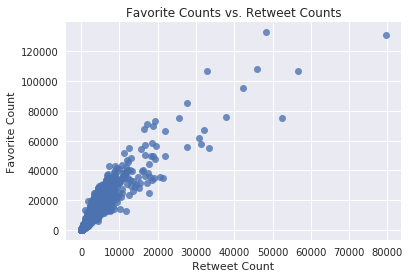

In [80]:
# A reg plot
ax = sns.regplot(x='retweet_count', y='favorite_count', data = df, fit_reg=False)
ax.set(xlabel='Retweet Count', ylabel='Favorite Count', title='Favorite Counts vs. Retweet Counts')
plt.show()

>We are going to compare different sources of tweets using seaborn's barplot

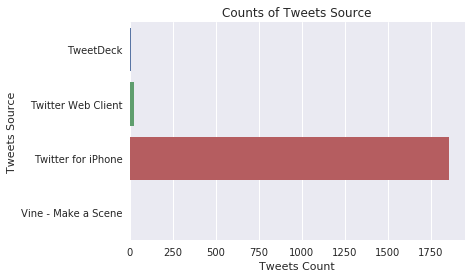

In [81]:
data = df.groupby('source').count()['tweet_id']
ax = sns.barplot(y=data.index, x=data.values)
ax.set(xlabel='Tweets Count', ylabel='Tweets Source', title='Counts of Tweets Source')
plt.show()

>Let us also compare the dog stages using the barplot from seaborn

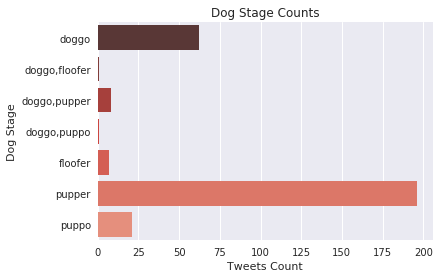

In [82]:
data = df.groupby('dog_stage').count()['tweet_id']
ax = sns.barplot(y=data.index, x=data.values, palette='Reds_d')
ax.set(xlabel='Tweets Count', ylabel='Dog Stage', title='Dog Stage Counts')
plt.show()

<a id='ins'></a>
### Insights:
1. There exists a highly positive correlation between Favoite counts and retweet counts

2. Over 90% of the Tweets are fom Twitter for iPhone

3. The Most common dog stage is pupper, followed by doggo and the third is puppo.

<a id='viz'></a>
### Visualization:

>Let us visualize the ratings distribution using a bar chart

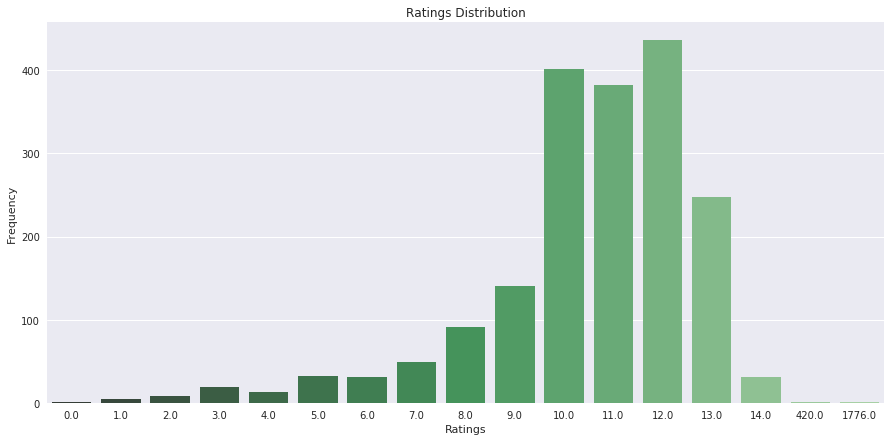

In [83]:
data = df.rating_numerator.value_counts()

x=data.index
y=data.values
fig, ax=plt.subplots(figsize=(15, 7))
g = sns.barplot(x,y, palette='Greens_d', ax=ax)
ax.set(xlabel='Ratings', ylabel='Frequency', title='Ratings Distribution')
plt.show()

> Let us visualize the most popular dog names using seaborn's bar plot

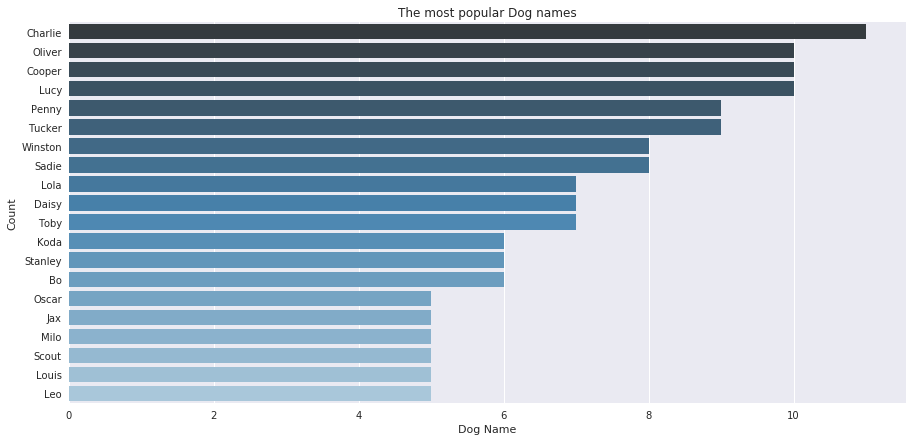

In [84]:
data = df.name.value_counts()[1:21]

fig, ax=plt.subplots(figsize=(15, 7))
g = sns.barplot(x=data.values, y=data.index, palette='Blues_d', ax=ax)
ax.set(xlabel='Dog Name', ylabel='Count', title='The most popular Dog names')
plt.show()